In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV,train_test_split  
import matplotlib.pylab as plt
from datetime import date 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
### Reading the train data
train=pd.read_csv("Train.csv",encoding = "ISO-8859-1")


1. Drop City Varibale because of too many variables
2. Convert **DOB** to **Age** COLUMN and Drop **DOB** column
3. Create a **EMI_Loan_Submitted_Missing** which is 1 f EMI_Loan_Submitted is missing else 0, drop variable **EMI_Loan_Submitted** dropped
4. Drop **EmployerName** because of too many categories
5. IMpute **Existing_EMI** with 0 (median) since only 111 values ARE missing
6. Create **Interest_Rate_Missing** which is 1 if Interest_Rate was missing else 0 | Drop Original variable **Interest_Rate**
7. Drop **Lead_Creation_Date** because made little intuitive impact on outcome
8. Impute **Loan_Amount_Applied, Loan_Tenure_Applied** with median values
9. Create **Loan_Amount_Submitted_Missing** which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable **Loan_Amount_Submitted**
10. Create **Loan_Tenure_Submitted_Missing** which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable **Loan_Tenure_Submitted**
11. Drop **LoggedIn, Salary_Account**
12. Create **Processing_Fee_Missing** which is 1 if Processing_Fee was missing else 0, drop Original variable **Processing_Fee**
13. Source – top 2 kept as is and all others combined into different category
14. Perform Numerical and One-Hot-Coding

In [3]:
# 1. Dropping city variables
train= train.drop(['City'],axis=1)

# 2. Convert DOB to Age COLUMN and Drop DOB column
train['Age']=2015-(1900+train['DOB'].str[-2:].astype(int))
train=train.drop(['DOB'],axis=1)

# 3. Create a EMI_Loan_Submitted_Missing which is 1 if EMI_Loan_Submitted is missing else 0, drop variable EMI_Loan_Submitted dropped
train['EMI_Loan_Submitted_Missing']=np.where((train['EMI_Loan_Submitted'].notnull()),0,1)
train=train.drop(['EMI_Loan_Submitted'],axis=1)

# 4. Drop EmployerName because of too many categories
train=train.drop(['Employer_Name'],axis=1)

# 5. IMpute Existing_EMI with 0 (median) since only 111 values ARE missing
train['Existing_EMI']=np.where(train['Existing_EMI'].isnull(),train['Existing_EMI'].median(),train['Existing_EMI'])

In [4]:
# 6. Create Interest_Rate_Missing which is 1 if Interest_Rate was missing else 0 | Drop Original variable Interest_Rate
train['Interest_Rate_Missing']=np.where((train['Interest_Rate'].notnull()),0,1)
train=train.drop(['Interest_Rate'],axis=1)

# 7. Drop Lead_Creation_Date because made little intuitive impact on outcome
train=train.drop(['Lead_Creation_Date'],axis=1)

# 8. Impute Loan_Amount_Applied, Loan_Tenure_Applied with median values
train['Loan_Amount_Applied']=np.where(train['Loan_Amount_Applied'].isnull(),train['Loan_Amount_Applied'].median(),train['Loan_Amount_Applied'])
train['Loan_Tenure_Applied']=np.where(train['Loan_Tenure_Applied'].isnull(),train['Loan_Tenure_Applied'].median(),train['Loan_Tenure_Applied'])

# 9. Create Loan_Amount_Submitted_Missing which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable Loan_Amount_Submitted
train['Loan_Amount_Submitted_Missing']=np.where((train['Loan_Amount_Submitted'].notnull()),0,1)
train=train.drop(['Loan_Amount_Submitted'],axis=1)

# 10. Create Loan_Tenure_Submitted_Missing which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable Loan_Tenure_Submitted
train['Loan_Tenure_Submitted_Missing']=np.where((train['Loan_Tenure_Submitted'].notnull()),0,1)
train=train.drop(['Loan_Tenure_Submitted'],axis=1)

In [5]:
# 11. Drop LoggedIn, Salary_Account
train=train.drop(['LoggedIn','Salary_Account'],axis=1)

# 12. Create Processing_Fee_Missing which is 1 if Processing_Fee was missing else 0, drop Original variable Processing_Fee
train['Processing_Fee_Missing']=np.where((train['Processing_Fee'].notnull()),0,1)
train=train.drop(['Processing_Fee'],axis=1)

In [6]:
train['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S129        3
S136        3
S139        3
S138        3
S135        2
S154        1
S130        1
S125        1
S140        1
Name: Source, dtype: int64

We can see that the top 2 occurred names are 'S122' and 'S133'

In [7]:
# 13. Source – top 2 kept as is and all others combined into different category
train["Source"].replace({"S122": 1, "S133": 2}, inplace=True)
train['Source']=np.where((train['Source']==1),1,np.where(train['Source']==2,2,0))

In [8]:
# 14. Perform Numerical and One-Hot-Coding
train["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)
train["Mobile_Verified"].replace({"Y": 1, "N": 0}, inplace=True)
train["Filled_Form"].replace({"Y": 1, "N": 0}, inplace=True)
train["Device_Type"].replace({"Web-browser": 1, "Mobile": 0}, inplace=True)

le = preprocessing.LabelEncoder()
train['Var1']=le.fit_transform(train['Var1'])
train['Var2']=le.fit_transform(train['Var2'])


In [9]:
train.shape

(87020, 21)

### Creating a base gbm model

In [10]:
#### Creating datatset with Dependent and indepent varaibles
Dependent=train["Disbursed"]
IndependentCols=train.columns.values[np.invert (pd.Series(train.columns.values).isin(["Disbursed","ID"]))]
Independent=train[IndependentCols]

## fitting a base gbm model
gbm0 = GradientBoostingClassifier(random_state=10) ## initialising base gbm model
gbm=gbm0.fit(Independent, Dependent)

In [11]:
#1. Print Accuracy
print("Accuracy:",gbm0.score(Independent, Dependent))

#2. Print AUC
from sklearn.metrics import roc_auc_score
Dependent_pred=gbm0.predict(Independent)
print("AUC:",roc_auc_score(Dependent, gbm0.decision_function(Independent)))


Accuracy: 0.9855665364284073
AUC: 0.8621716258368041


In [12]:
# 3. Create the 5 fold cross validation on auc score, calculate the mean,std dev, min and max of all the 5 folds
from sklearn.model_selection import cross_validate
cv_results = cross_validate(gbm0, Independent, Dependent,scoring='roc_auc', cv=5)
cross_val_auc=cv_results['test_score']

In [13]:
print("Mean:", cross_val_auc.mean())
print("Standard Deviation:", cross_val_auc.std())
print("Min:", cross_val_auc.min())
print("Max:", cross_val_auc.max())

Mean: 0.8317008138934963
Standard Deviation: 0.010009503123274902
Min: 0.8204275613507495
Max: 0.8458905166825026


Text(0, 0.5, 'FEATURE NAMES')

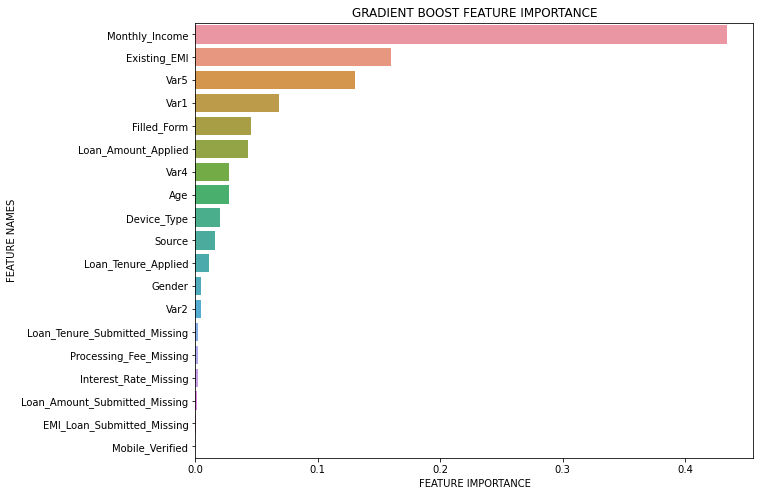

In [14]:
# 4. print feature importance in ascending order and plot it
imp_features=gbm.feature_importances_

columns=Independent.columns
df_imp_features = pd.DataFrame({"features":columns}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False,inplace=True)

import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x=df_imp_features['weights'], y=df_imp_features['features'])
plt.title('GRADIENT BOOST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [15]:
### Creating Models by  tuning n_estimators  by varying from its values from 20 to 80 in steps of 10
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(Independent,Dependent)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.7587718 , 1.11020966, 1.46322894, 1.85302634, 2.24981265,
         2.61060896, 2.93282561]),
  'std_fit_time': array([0.0041649 , 0.01396627, 0.0202951 , 0.02712452, 0.02073448,
         0.0442223 , 0.0580384 ]),
  'mean_score_time': array([0.01875572, 0.02295079, 0.02749915, 0.03265891, 0.03691235,
         0.04192595, 0.04499226]),
  'std_score_time': array([0.00102831, 0.00107918, 0.00150744, 0.00114311, 0.00225945,
         0.00254122, 0.00537812]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.81910746, 0.81905833, 0.82075549, 0.81958128, 0.8179376 ,
         0.81581552, 0.81227107]),
  'spl

#####  Tune the model with parameters  max_depth and min_samples_split
##### from above take the n_estimators with max mean AUC on cv sample and use it for tuning the model on two parameters below
##### (i) max depth varying from 5 and 15 in steps of 2
##### (ii) min_samples_split varying from 200 and 1000 in steps of 200
##### store the output of tuned model in object "gsearch2"

In [16]:
param_test2 = {'min_samples_split':np.arange(200,1000,200), 'max_depth':np.arange(5,15,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=gsearch1.best_params_['n_estimators'],min_samples_leaf=50,max_depth=param_test1,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(Independent,Dependent)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth={'n_estimators': array([20, 30, 40, 50, 60, 70, 80])},
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  n_estimators=50,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13]),
                         'min_samples_split': array([200, 400, 600, 800])},
             scoring='roc_auc')

In [17]:
## Tuning the Model with best max depth from above and varying 
## (i)min_samples_split':range(1000,2100,200), 
## (i)'min_samples_leaf':range(30,71,10)

param_test3 = {'min_samples_split':np.arange(1000,2100,200), 'min_samples_leaf':np.arange(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(Independent,Dependent)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([1.86694264, 1.88050065, 1.88815346, 1.88601909, 1.88513193,
         1.85966434, 1.92305417, 1.91999846, 1.9190393 , 1.90055137,
         1.89190931, 1.88068151, 1.94384141, 1.92865863, 1.93177919,
         1.91351252, 1.89905257, 1.89097633, 1.95092077, 1.94865842,
         1.93448086, 1.9345994 , 1.92685881, 1.90761175, 1.96673479,
         1.94365745, 1.93871641, 1.93405943, 1.92439079, 1.73874907]),
  'std_fit_time': array([0.03175215, 0.02100781, 0.02078495, 0.01983003, 0.01896432,
         0.0203221 , 0.01695563, 0.01132972, 0.01312094, 0.0248034 ,
         0.02506122, 0.01896498, 0.01923879, 0.02420163, 0.01538725,
         0.02018636, 0.0283771 , 0.02069657, 0.01791019, 0.01785543,
         0.01597766, 0.02165455, 0.01968681, 0.01072809, 0.02535753,
         0.01531167, 0.02145019, 0.02254659, 0.02109509, 0.20805426]),
  'mean_score_time': array([0.03247533, 0.03264246, 0.0321589 , 0.03210411, 0.03225698,
         0.03199964, 0.03304167, 0.03280506, 0.

###### Tune the Model with "max_features" parameter by trying  values from 7 to 19 in steps of 2, take the best parameter of "min_samples_split" and "min_samples_leaf"  which gives best auc on cv sample from above, create the gsearch obejct with name **gsearch4**

In [18]:
param_test4 = {'max_features':np.arange(7,19,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=gsearch3.best_params_['min_samples_split'],min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],n_estimators=gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'], subsample=0.8, random_state=10), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(Independent,Dependent)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=7,
                                                  min_samples_leaf=70,
                                                  min_samples_split=1800,
                                                  n_estimators=50,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_features': array([ 7,  9, 11, 13, 15, 17])},
             scoring='roc_auc')


###### Tune the Model with the "subsample" parameter  by trying  values [0.6,0.7,0.75,0.8,0.85,0.9], taking the other opttimum features from above ,create the gsearch obejct with name **gsearch5**

In [19]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=gsearch3.best_params_['min_samples_split'],min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],n_estimators=gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features=gsearch4.best_params_['max_features'], random_state=10), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(Independent,Dependent)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=7, max_features=7,
                                                  min_samples_leaf=70,
                                                  min_samples_split=1800,
                                                  n_estimators=50,
                                                  random_state=10),
             n_jobs=4,
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
             scoring='roc_auc')


###### Create a gbm Model "gbm_tuned1","gbm_tuned2" ,"gbm_tuned3" by tuning the above model by taking the best subsample by  
###### (i)decreasing the learning rate to half, i.e. 0.05, with twice the number of trees.
###### (ii)decreasing the learning rate to 1/20, i.e. 0.02, with 10 times number of trees.
###### (iii)decreasing the learning rate to 1/20, i.e. 0.005, with 20 times number of trees.
###### (iv) choose the model with leat average AUC on cross validation
###### (v) use the model selected in step (iv) and score the test data



In [20]:
param_test6={'learning_rate':[0.05]}
gbm_tuned1=GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=gsearch3.best_params_['min_samples_split'],min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],n_estimators=2*gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features=gsearch4.best_params_['max_features'],subsample=gsearch5.best_params_['subsample'], random_state=10),param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gbm_tuned1.fit(Independent,Dependent)
gbm_tuned1.cv_results_, gbm_tuned1.best_params_, gbm_tuned1.best_score_

({'mean_fit_time': array([5.44836726]),
  'std_fit_time': array([0.54569116]),
  'mean_score_time': array([0.050631]),
  'std_score_time': array([0.00672291]),
  'param_learning_rate': masked_array(data=[0.05],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05}],
  'split0_test_score': array([0.82418574]),
  'split1_test_score': array([0.82763263]),
  'split2_test_score': array([0.84762766]),
  'split3_test_score': array([0.84941339]),
  'split4_test_score': array([0.83511346]),
  'mean_test_score': array([0.83679458]),
  'std_test_score': array([0.01022096]),
  'rank_test_score': array([1], dtype=int32)},
 {'learning_rate': 0.05},
 0.836794575404505)

In [21]:
param_test7={'learning_rate':[0.02]}
gbm_tuned2=GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=gsearch3.best_params_['min_samples_split'],min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],n_estimators=10*gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features=gsearch4.best_params_['max_features'],subsample=gsearch5.best_params_['subsample'],random_state=10),param_grid = param_test7, scoring='roc_auc',n_jobs=4, cv=5)
gbm_tuned2.fit(Independent,Dependent)
gbm_tuned2.cv_results_, gbm_tuned2.best_params_, gbm_tuned2.best_score_

({'mean_fit_time': array([27.07791386]),
  'std_fit_time': array([2.57735207]),
  'mean_score_time': array([0.2003036]),
  'std_score_time': array([0.02942688]),
  'param_learning_rate': masked_array(data=[0.02],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.02}],
  'split0_test_score': array([0.82705103]),
  'split1_test_score': array([0.83042435]),
  'split2_test_score': array([0.84996221]),
  'split3_test_score': array([0.84887211]),
  'split4_test_score': array([0.83374575]),
  'mean_test_score': array([0.83801109]),
  'std_test_score': array([0.00955684]),
  'rank_test_score': array([1], dtype=int32)},
 {'learning_rate': 0.02},
 0.8380110906385291)

In [22]:
param_test8={'learning_rate':[0.005]}
gbm_tuned3=GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=gsearch3.best_params_['min_samples_split'],min_samples_leaf=gsearch3.best_params_['min_samples_leaf'],n_estimators=20*gsearch1.best_params_['n_estimators'],max_depth=gsearch2.best_params_['max_depth'],max_features=gsearch4.best_params_['max_features'],subsample=gsearch5.best_params_['subsample'] ,random_state=10),param_grid = param_test8, scoring='roc_auc',n_jobs=4, cv=5)
gbm_tuned3.fit(Independent,Dependent)
gbm_tuned3.cv_results_, gbm_tuned3.best_params_, gbm_tuned3.best_score_

({'mean_fit_time': array([53.49482374]),
  'std_fit_time': array([5.29341611]),
  'mean_score_time': array([0.44671879]),
  'std_score_time': array([0.07546798]),
  'param_learning_rate': masked_array(data=[0.005],
               mask=[False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.005}],
  'split0_test_score': array([0.82652166]),
  'split1_test_score': array([0.82875898]),
  'split2_test_score': array([0.84877653]),
  'split3_test_score': array([0.85060216]),
  'split4_test_score': array([0.83686295]),
  'mean_test_score': array([0.83830446]),
  'std_test_score': array([0.00992901]),
  'rank_test_score': array([1], dtype=int32)},
 {'learning_rate': 0.005},
 0.8383044557072985)

In [23]:
#The model with least average AUC on cross validation is gbm_tuned1

In [24]:
test=pd.read_csv("Test.csv",encoding = "ISO-8859-1")
test

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4
0,ID000026A10,Male,Dehradun,21500,03-Apr-87,05-May-15,100000.0,3.0,0.0,APTARA INC,...,100000.0,3.0,20.0,1000.0,2649.39,N,Web-browser,B,S122,3
1,ID000054C40,Male,Mumbai,42000,12-May-80,01-May-15,0.0,0.0,0.0,ATUL LTD,...,690000.0,5.0,24.0,13800.0,19849.90,Y,Mobile,C,S133,5
2,ID000066O10,Female,Jaipur,10000,19-Sep-89,01-May-15,300000.0,2.0,0.0,SHAREKHAN PVT LTD,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,B,S133,1
3,ID000110G00,Female,Chennai,14650,15-Aug-91,01-May-15,0.0,0.0,0.0,MAERSK GLOBAL SERVICE CENTRES,...,NaN,NaN,NaN,NaN,NaN,N,Mobile,C,S133,1
4,ID000113J30,Male,Chennai,23400,22-Jul-87,01-May-15,100000.0,1.0,5000.0,SCHAWK,...,100000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37712,ID124809J40,Female,Ponda,40000,28-Dec-71,31-Jul-15,1000000.0,4.0,10000.0,GOVT EMPLOYEE,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,3
37713,ID124817R20,Male,Chandigarh,20500,09-Feb-84,31-Jul-15,0.0,0.0,0.0,MAX SUPER SPECIALITY HOSPITAL MOHALI,...,330000.0,4.0,31.5,6600.0,12171.60,Y,Mobile,G,S122,5
37714,ID124820U00,Male,Meerut,25000,18-Dec-69,31-Jul-15,0.0,0.0,0.0,C.I.S.F,...,390000.0,4.0,NaN,NaN,NaN,N,Mobile,G,S122,3
37715,ID124822W20,Female,Kolkata,130000,01-Jan-72,31-Jul-15,600000.0,0.0,67000.0,TATA STEEL LTD,...,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1


In [25]:
# 1. Dropping city variables
test= test.drop(['City'],axis=1)

# 2. Convert DOB to Age COLUMN and Drop DOB column
test['Age']=2015-(1900+test['DOB'].str[-2:].astype(int))
test=test.drop(['DOB'],axis=1)

# 3. Create a EMI_Loan_Submitted_Missing which is 1 if EMI_Loan_Submitted is missing else 0, drop variable EMI_Loan_Submitted dropped
test['EMI_Loan_Submitted_Missing']=np.where((test['EMI_Loan_Submitted'].notnull()),0,1)
test=test.drop(['EMI_Loan_Submitted'],axis=1)

# 4. Drop EmployerName because of too many categories
test=test.drop(['Employer_Name'],axis=1)

# 5. IMpute Existing_EMI with 0 (median) since only 111 values ARE missing
test['Existing_EMI']=np.where(test['Existing_EMI'].isnull(),test['Existing_EMI'].median(),test['Existing_EMI'])

In [26]:
# 6. Create Interest_Rate_Missing which is 1 if Interest_Rate was missing else 0 | Drop Original variable Interest_Rate
test['Interest_Rate_Missing']=np.where((test['Interest_Rate'].notnull()),0,1)
test=test.drop(['Interest_Rate'],axis=1)

# 7. Drop Lead_Creation_Date because made little intuitive impact on outcome
test=test.drop(['Lead_Creation_Date'],axis=1)

# 8. Impute Loan_Amount_Applied, Loan_Tenure_Applied with median values
test['Loan_Amount_Applied']=np.where(test['Loan_Amount_Applied'].isnull(),test['Loan_Amount_Applied'].median(),test['Loan_Amount_Applied'])
test['Loan_Tenure_Applied']=np.where(test['Loan_Tenure_Applied'].isnull(),test['Loan_Tenure_Applied'].median(),test['Loan_Tenure_Applied'])

# 9. Create Loan_Amount_Submitted_Missing which is 1 if Loan_Amount_Submitted was missing else 0 , drop Original variable Loan_Amount_Submitted
test['Loan_Amount_Submitted_Missing']=np.where((test['Loan_Amount_Submitted'].notnull()),0,1)
test=test.drop(['Loan_Amount_Submitted'],axis=1)

# 10. Create Loan_Tenure_Submitted_Missing which is 1 if Loan_Tenure_Submitted was missing else 0, drop Original variable Loan_Tenure_Submitted
test['Loan_Tenure_Submitted_Missing']=np.where((test['Loan_Tenure_Submitted'].notnull()),0,1)
test=test.drop(['Loan_Tenure_Submitted'],axis=1)

In [27]:
# 11. Drop LoggedIn, Salary_Account
test=test.drop(['Salary_Account'],axis=1)

# 12. Create Processing_Fee_Missing which is 1 if Processing_Fee was missing else 0, drop Original variable Processing_Fee
test['Processing_Fee_Missing']=np.where((test['Processing_Fee'].notnull()),0,1)
test=test.drop(['Processing_Fee'],axis=1)

In [28]:
# 13. Source – top 2 kept as is and all others combined into different category
test["Source"].replace({"S122": 1, "S133": 2}, inplace=True)
test['Source']=np.where((test['Source']==1),1,np.where(test['Source']==2,2,0))

In [29]:
# 14. Perform Numerical and One-Hot-Coding
test["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)
test["Mobile_Verified"].replace({"Y": 1, "N": 0}, inplace=True)
test["Filled_Form"].replace({"Y": 1, "N": 0}, inplace=True)
test["Device_Type"].replace({"Web-browser": 1, "Mobile": 0}, inplace=True)


test['Var1']=le.fit_transform(test['Var1'])
test['Var2']=le.fit_transform(test['Var2'])

In [30]:
IndependentCols_test=test.columns.values[np.invert (pd.Series(test.columns.values).isin(["ID"]))]
Independent_test=test[IndependentCols_test]


In [38]:
print("AUC:",roc_auc_score(Dependent, gbm_tuned1.decision_function(Independent)))

AUC: 0.8857489566920556


In [37]:
test['predicted_Disbursed']=gbm_tuned1.predict(Independent_test)
test['predicted_Disbursed'].value_counts()

0    37717
Name: predicted_Disbursed, dtype: int64

In [33]:
print("AUC:",roc_auc_score(Dependent, gbm0.decision_function(Independent)))

AUC: 0.8621716258368041


In [34]:
df=pd.DataFrame(gbm0.predict(Independent_test))
df[0].value_counts()

0    37699
1       18
Name: 0, dtype: int64